<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_15_Convolution_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

# visualization
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

# Convolution with Conv2 in PyTorch

## Create a class instance

In [2]:
# Create a conv2d class instance with parameters defined below
inChans = 3 # RGB
outChans = 15 # 15 feature map
krnSize = 5 # Kernel Size (odd)
stride = 1  # No Stride
padding = 0  # not adding any padding

# Now create the instance as follows (cf nn.Linear)
# This is like the first convolutional layer
c = nn.Conv2d(inChans, outChans, krnSize, stride, padding)

# Print it out
print(c)

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))


In [3]:
# Check out the weight tensor
print(f"The size of weights: {c.weight.shape}")
print()
print(f"Size of Bias: {c.bias.shape}")
# Each channel has a bias, thus 3 in, 5 out = 15

The size of weights: torch.Size([15, 3, 5, 5])

Size of Bias: torch.Size([15])


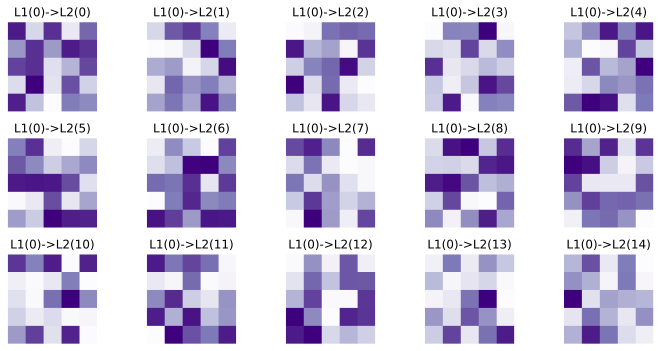

In [4]:
# How do kernels look like: They are small images that can be visualized
# They are initialized randomly
fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap="Purples")
    ax.set_title("L1(0)->L2(%s)"%i)
    ax.axis("off")

plt.tight_layout()
plt.show()

## Convolve with an Image

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


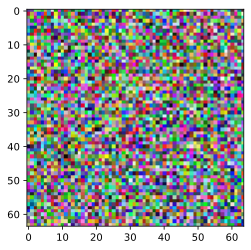

In [5]:
# Definition of image size (N, RGB, Width, Height)
imsize = (1, 3, 64, 64)

img = torch.rand(imsize)

# PyTorch asks for channels first, Matplotlib asks for channels last!
# Permute tensors for visualization
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

In [6]:
# Convolve the image with the filter bank (set of outChains kernels)
convRes = c(img)

print(img.shape)
# 1 image, 15 kernels, 60x60 image: lost in padding because of kernel
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


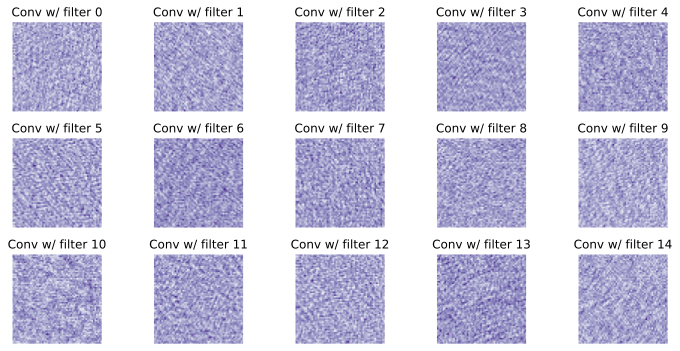

In [7]:
# Visualoze the convolved image: Feature Maps
fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):

    # Extract this layer of the convolution result
    I = torch.squeeze(convRes[0,i,:,:]).detach()

    # Visualize it
    ax.imshow(I,cmap="Purples")
    ax.set_title("Conv w/ filter %s"%i)
    ax.axis("off")

plt.tight_layout()
plt.show()

# Code Challenge: Parameter Choice

In [8]:
# Start with an image of size 1x256x256 to produce a feature matrix of 1x252x84
# The initial parameters are as follows:
inChans = 1  # gray-scale image
imsize = [256,256]
outChans = 1
krnSize = 7 # Kernel Size (odd)
stride = (1,3) # no stride on width, stride 3 on height
padding = 1

# Now create the instance as follows (cf nn.Linear)
c = nn.Conv2d(inChans, outChans, krnSize, stride, padding)

# Print it out
print(c)

Conv2d(1, 1, kernel_size=(7, 7), stride=(1, 3), padding=(1, 1))


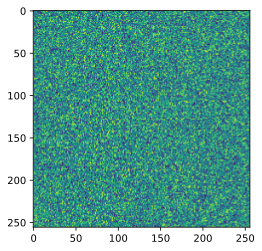

In [9]:
# Create an image
img = torch.rand(1,inChans,imsize[0],imsize[1])
img_v = img.permute(2,3,1,0).numpy()
plt.imshow(np.squeeze(img_v));

In [10]:
# Run convolution on the image
resimg = c(img)
# The emoirical size of the result of convolution
empsize = torch.squeeze(resimg).shape
print(empsize)

torch.Size([252, 84])


In [11]:
# Compute the size of the result according to the formula
expectedSize = np.array([outChans,0,0],dtype=int)
expectedSize[1] = np.floor((imsize[0] +2*padding-krnSize)/stride[0]) + 1
expectedSize[2] = np.floor((imsize[1] +2*padding-krnSize)/stride[1]) + 1

# Print the size of the output
print(f"Expected Size: {expectedSize}")
print(f"Epirical Size: {list(empsize)}")

Expected Size: [  1 252  84]
Epirical Size: [252, 84]


## Real Problem

1 - Convolve an image of 3x64x64 to produce 10x28x28

In [12]:
# Parameters
inChans  = 3
imsize   = [64,64]
outChans = 10
krnSize  = 9
stride   = (2,2)
padding  = 0

# create the instance
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

# create an image
img = torch.rand(1,inChans,imsize[0],imsize[1])

# run convolution and compute its shape
resimg = c(img)
empSize = torch.squeeze(resimg).shape

# compute the size of the result according to the formula
expectSize = np.array([outChans,0,0],dtype=int)
expectSize[1] = np.floor( (imsize[0]+2*padding-krnSize)/stride[0] ) + 1
expectSize[2] = np.floor( (imsize[1]+2*padding-krnSize)/stride[1] ) + 1

# check the size of the output
print(f'Expected size: {expectSize}')
print(f'Empirical size: {list(empSize)}')

Expected size: [10 28 28]
Empirical size: [10, 28, 28]


2 - Convolve an image of size 3x196x96 to produce a 5x66x49 result

In [13]:
# parameters
inChans  = 3
imsize   = [196,96]
outChans = 5
krnSize  = 5
stride   = (3,2)
padding  = 3

# create the instance
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

# create an image
img = torch.rand(1,inChans,imsize[0],imsize[1])

# run convolution and compute its shape
resimg = c(img)
empSize = torch.squeeze(resimg).shape

# compute the size of the result according to the formula
expectSize = np.array([outChans,0,0],dtype=int)
expectSize[1] = np.floor( (imsize[0]+2*padding-krnSize)/stride[0] ) + 1
expectSize[2] = np.floor( (imsize[1]+2*padding-krnSize)/stride[1] ) + 1

# check the size of the output
print(f'Expected size: {expectSize}')
print(f'Empirical size: {list(empSize)}')

Expected size: [ 5 66 49]
Empirical size: [5, 66, 49]


3 - Convolve an image of size 1x32x32 to produce a 6x28x28 result

In [14]:
# these dimensions are the input -> first hidden layer of the famous LeNet-5
# parameters
inChans  = 1
imsize   = [32,32]
outChans = 6
krnSize  = 5
stride   = (1,1)
padding  = 0

# create the instance
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

# create an image
img = torch.rand(1,inChans,imsize[0],imsize[1])

# run convolution and compute its shape
resimg = c(img)
empSize = torch.squeeze(resimg).shape

# compute the size of the result according to the formula
expectSize = np.array([outChans,0,0],dtype=int)
expectSize[1] = np.floor( (imsize[0]+2*padding-krnSize)/stride[0] ) + 1
expectSize[2] = np.floor( (imsize[1]+2*padding-krnSize)/stride[1] ) + 1

# check the size of the output
print(f'Expected size: {expectSize}')
print(f'Empirical size: {list(empSize)}')

Expected size: [ 6 28 28]
Empirical size: [6, 28, 28]


4 -  Convolve an image of size 3x227x227 to produce a 96x55x55 result

In [15]:
# these dimensions are the input -> first hidden layer of the famous AlexNet
# parameters
inChans  = 3
imsize   = [227,227]
outChans = 96
krnSize  = 11
stride   = (4,4)
padding  = 1

# create the instance
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

# create an image
img = torch.rand(1,inChans,imsize[0],imsize[1])

# run convolution and compute its shape
resimg = c(img)
empSize = torch.squeeze(resimg).shape

# compute the size of the result according to the formula
expectSize = np.array([outChans,0,0],dtype=int)
expectSize[1] = np.floor( (imsize[0]+2*padding-krnSize)/stride[0] ) + 1
expectSize[2] = np.floor( (imsize[1]+2*padding-krnSize)/stride[1] ) + 1

# check the size of the output
print(f'Expected size: {expectSize}')
print(f'Empirical size: {list(empSize)}')

Expected size: [96 55 55]
Empirical size: [96, 55, 55]


5 - Convolve an image of size 3x224x224 to produce a 64x224x224 result

In [16]:
# these dimensions are the input -> first hidden layer of the famous VGG-16
# parameters
inChans  = 3
imsize   = [224,224]
outChans = 64
krnSize  = 3
stride   = (1,1)
padding  = 1

# create the instance
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

# create an image
img = torch.rand(1,inChans,imsize[0],imsize[1])

# run convolution and compute its shape
resimg = c(img)
empSize = torch.squeeze(resimg).shape

# compute the size of the result according to the formula
expectSize = np.array([outChans,0,0],dtype=int)
expectSize[1] = np.floor( (imsize[0]+2*padding-krnSize)/stride[0] ) + 1
expectSize[2] = np.floor( (imsize[1]+2*padding-krnSize)/stride[1] ) + 1

# check the size of the output
print(f'Expected size: {expectSize}')
print(f'Empirical size: {list(empSize)}')

Expected size: [ 64 224 224]
Empirical size: [64, 224, 224]


# Transpose Convolution

In [17]:
# Create a ConvTranspose2d Class instance with the following parameters
inChans  = 3  # RGB dimension
outChans = 15  # number of feature maps
krnSize  = 5
stride   = 1
padding  = 0

# Transpose convolution class
c = nn.ConvTranspose2d(inChans, outChans, krnSize, stride, padding)

# Check it out
print(c)
print()

# CHeck out the weight tensor and dimensions
print(f"Size of weights: {c.weight.shape}")
print(f"Size of biases: {c.bias.shape}")

ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))

Size of weights: torch.Size([3, 15, 5, 5])
Size of biases: torch.Size([15])


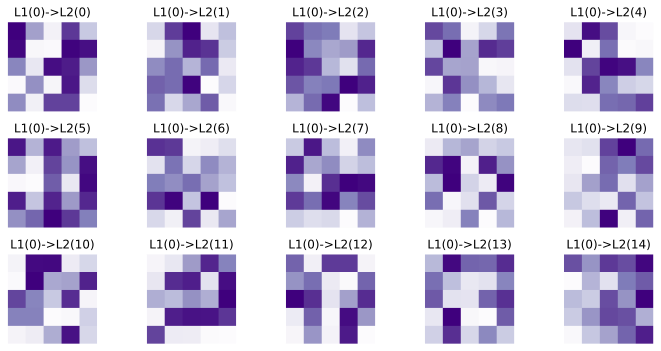

In [18]:
# Vislalize the Kernels
fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(c.weight[0,i,:,:]).detach(),cmap="Purples")
    ax.set_title("L1(0)->L2(%s)"%i)
    ax.axis("off")

plt.tight_layout()
plt.show()

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


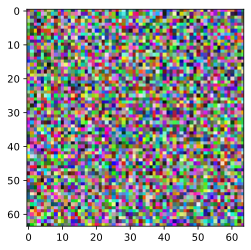

In [19]:
# Now convolve with an image
imsize = (1,3,64,64)

# Create random image
img = torch.rand(imsize)

img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)
plt.imshow(np.squeeze(img2view));

In [20]:
# Convolve the image with filter bank
convRes = c(img)
print(img.shape)
print(convRes.shape)
# Size increases: 15 feature maps plus increase in dimensions

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])


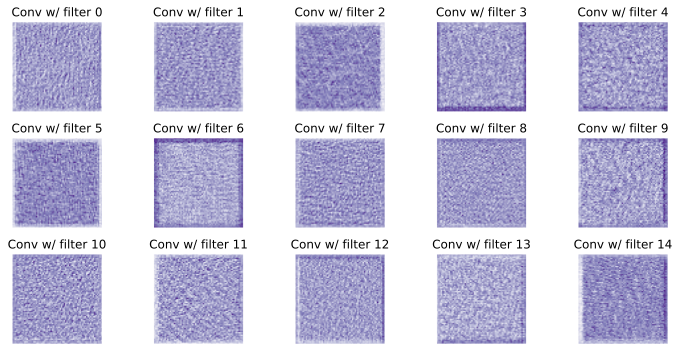

In [21]:
# Visualoze the convolved image: Feature Maps
fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):

    # Extract this layer of the convolution result
    I = torch.squeeze(convRes[0,i,:,:]).detach()

    # Visualize it
    ax.imshow(I,cmap="Purples")
    ax.set_title("Conv w/ filter %s"%i)
    ax.axis("off")

plt.tight_layout()
plt.show()